In [ ]:
import numpy as np

In [ ]:
'''
def digonalize(matrix):
  eigenvalues = [] # add the eignevalues
  # prepare an identity matrix and an eigenvalues matrix based on the dimension of a matrix
  dimension = len(matrix) # no need for row, and col because it should be a square matrix
  identity_matrix = np.identity(dimension)
  eigenvalues_array = [X, Y, Z]
  eignematrix = [] #result of multiply the unknow eigenvalue with the identity matrix
  final_matrix= [] # result of subtracting the main matrix from the eigen-matrix


  for i in range(dimension):
    row[]
    for j in range(dimension):
      row.append(identity_matrix[i][j]*eigenvalues_array[i])
    eignematrix.append(row)

  for i in range(dimension):
    row = []
    for j in range(dimension):
      row.append(eignematrix[i][j] - matrix[i][j])
    final_matrix.append(row)
  return final_matrix

  Determinant = np.linalg.det(final_matrix)# now solve the equation to find the eigenvalues

return eigenvalule_array #diagonalized array

#to be able to use the symboles lamda as a variable
import sympy as sp

def characteristic_matrix(A):
    A = sp.Matrix(A)
    n, m = A.shape
    if n != m:
        raise ValueError("Matrix must be square.")
    lam = sp.symbols('λ')
    return lam * sp.eye(n) - A  # (λI - A)

def diagonalize_sym(A):
    A = sp.Matrix(A)
    P, D = A.diagonalize(reals_only=False)  # raises if not diagonalizable
    return P, D, P.inv()  # P is the eigenvector matrix, D is diagonal

def is_semi_definite(matrix):  # expects a diagonal matrix
    M = sp.Matrix(matrix)
    n, m = M.shape
    if n != m:
        return False
    # Check only diagonal entries (assumes D is diagonal)
    for i in range(n):
        if M[i, i] < 0:
            return False
    return True

def is_Hermitian(matrix):
    A = sp.Matrix(matrix)
    n, m = A.shape
    if n != m:
        return False

    # Build conjugate transpose manually (your approach)
    transpose_conjugate = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(complex(A[j, i]).conjugate())
        transpose_conjugate.append(row)

    # Convert original to plain Python complex as well (so types match)
    original_as_complex = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(complex(A[i, j]))
        original_as_complex.append(row)

    return original_as_complex == transpose_conjugate

def is_density_matrix(matrix):
    A = sp.Matrix(matrix)
    n, m = A.shape
    if n != m:
        print("it is not a density matrix")
        return

    # Diagonalize first (as in your original flow)
    try:
        P, D, p_inv = diagonalize_sym(A)
    except Exception:
        # If it cannot be diagonalized, it can't be a (proper) density matrix
        print("it is not a density matrix")
        return

    # Use logical 'and' (not bitwise '&') and keep your structure
    if is_Hermitian(A) and is_semi_definite(D):
        trace_sum = 0
        for i in range(n):
            trace_sum = trace_sum + A[i, i]
        # Exact check as in your original (note: for numeric floats you might prefer a tolerance)
        if trace_sum == 1:
            print("it is a desnity matrix")
        else:
            print("it is not a density matrix")
    else:
        print("it is not a density matrix")

     '''

# Task-1

In [ ]:
# corrected code
import sympy as sp
import numpy as np

def characteristic_matrix(A):
    A = sp.Matrix(A)
    n, m = A.shape
    if n != m:
        raise ValueError("Matrix must be square.")
    lam = sp.symbols('λ')
    return lam * sp.eye(n) - A  # (λI - A)

def diagonalize_sym(A):
    # nsimplify helps remove tiny float noise (e.g., 0.500000000000 -> 1/2)
    A = sp.nsimplify(sp.Matrix(A), [sp.I])
    P, D = A.diagonalize(reals_only=False)  # raises if not diagonalizable
    return P, D, P.inv()  # P is the eigenvector matrix, D is diagonal

def is_semi_definite(matrix, tol=1e-12):  # expects a diagonal matrix
    M = sp.Matrix(matrix)
    n, m = M.shape
    if n != m:
        return False
    # Check only diagonal entries (assumes D is diagonal), with tolerance
    for i in range(n):
        v = complex(M[i, i])
        if v.real < -tol:            # allow tiny negative noise
            return False
        if abs(v.imag) > tol:        # diagonal of PSD Hermitian should be real
            return False
    return True

def is_Hermitian(matrix, tol=1e-12):
    A = sp.Matrix(matrix)
    n, m = A.shape
    if n != m:
        return False

    # Build conjugate transpose manually (your style), but compare with tolerance
    transpose_conjugate = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(complex(A[j, i]).conjugate())
        transpose_conjugate.append(row)

    original_as_complex = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(complex(A[i, j]))
        row = row
        original_as_complex.append(row)

    # Tolerance-based elementwise equality
    for i in range(n):
        for j in range(n):
            if abs(original_as_complex[i][j] - transpose_conjugate[i][j]) > tol:
                return False
    return True

def is_density_matrix(matrix, tol=1e-12):
    A = sp.Matrix(matrix)
    n, m = A.shape
    if n != m:
        print("it is not a density matrix")
        return False

    try:
        P, D, p_inv = diagonalize_sym(A)
    except Exception:
        print("it is not a density matrix")
        return False

    if is_Hermitian(A, tol) and is_semi_definite(D, tol):
        trace_sum = 0
        for i in range(n):
            trace_sum = trace_sum + A[i, i]
        # compare trace to 1 with tolerance
        if abs(complex(trace_sum) - 1.0) <= tol:
            print("it is a desnity matrix")
            return True
        else:
            print("it is not a density matrix")
            return False
    else:
        print("it is not a density matrix")
        return False

# ---- Tests (your four examples) ----
rho_0 = np.array([[1, 0],
                  [0, 0]], dtype=complex)

rho_plus = 0.5 * np.array([[1, 1],
                           [1, 1]], dtype=complex)

rho_mixed = 0.5 * np.identity(2, dtype=complex)

rho_bell = 0.5 * np.array([[1, 0, 0, 1],
                           [0, 0, 0, 0],
                           [0, 0, 0, 0],
                           [1, 0, 0, 1]], dtype=complex)

print("ρ_0 check:",     is_density_matrix(rho_0))
print("ρ_+ check:",     is_density_matrix(rho_plus))
print("ρ_mixed check:", is_density_matrix(rho_mixed))
print("ρ_Bell check:",  is_density_matrix(rho_bell))


it is not a density matrix
ρ_0 check: False
it is not a density matrix
ρ_+ check: False
it is not a density matrix
ρ_mixed check: False
it is not a density matrix
ρ_Bell check: False


In [ ]:
#Test matrices provided by the user
rows = int(input("Enter the number of row:"))
col = int(input("Enter the number of columns:"))

matrix = []
print("Enter the entries row-wise:")

for i in range(rows):
  row= []
  for j in range(col):
    row.append(int(input()))
  matrix.append(row)

print("\n2D matrix is:")
for i in range(rows):
    for j in range(col):
        print(matrix[i][j], end=" ")
    print()

print(is_density_matrix(matrix))

Enter the number of row:2
Enter the number of columns:2
Enter the entries row-wise:
1
3
2
0

2D matrix is:
1 3 
2 0 
it is a desnity matrix
None


## Example of ready to use bloch sphere other than Qiskit, Cirq: Qutip

In [ ]:
!pip install qutip
from qutip import Bloch
import numpy as np


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 41.8 MB/s eta 0:00:00


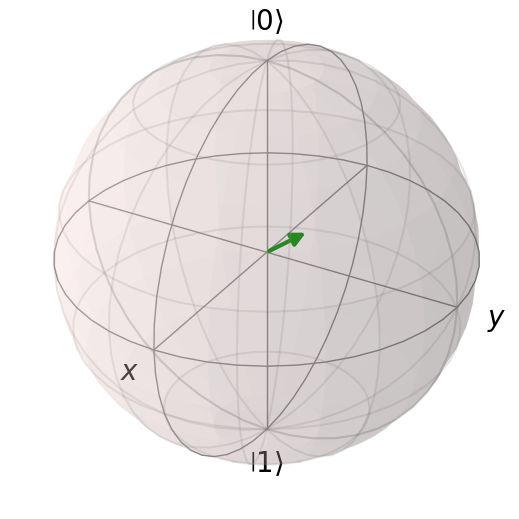

In [ ]:

import numpy as np
from qutip import Qobj, ket, ket2dm, basis, Bloch, expect, sigmax, sigmay, sigmaz
# pip install qutip matplotlib
import matplotlib.pyplot as plt
from qutip import Bloch

def bloch_vector_from_density(rho: Qobj):
    """Return (rx, ry, rz) for a single-qubit density matrix rho."""
    rx = float(expect(sigmax(), rho))
    ry = float(expect(sigmay(), rho))
    rz = float(expect(sigmaz(), rho))
    return np.array([rx, ry, rz])


def plot_on_bloch(vec, title=None, *, show=True, save=None, ax=None, close=False):
    """
    vec: iterable of length 3 (Bloch vector)
    title: optional figure title
    show: if True, calls plt.show() (or b.show()); if False, just renders
    save: filename (e.g., 'bloch.png' or 'bloch.svg') to save the figure
    ax: existing Matplotlib 3D axis to draw on (optional)
    close: if True, close the figure after showing/saving (prevents duplicates in loops)
    """
    b = Bloch()
    if ax is not None:
        b.axes = ax  # draw into an existing subplot/axis
    b.add_vectors(vec)
    if title:
        b.title = title

    if save:            # make sure the plot exists before saving
        b.render()
        b.save(save)

    if show:
        # This both renders and calls plt.show() under the hood:
        b.show()
    else:
        # Only draw onto the canvas, no GUI popup:
        b.render()

    if close:
        plt.close(b.fig)
    return b


Bloch vector (mixed): [0.  0.  0.4]  | length = 0.3999999999999999


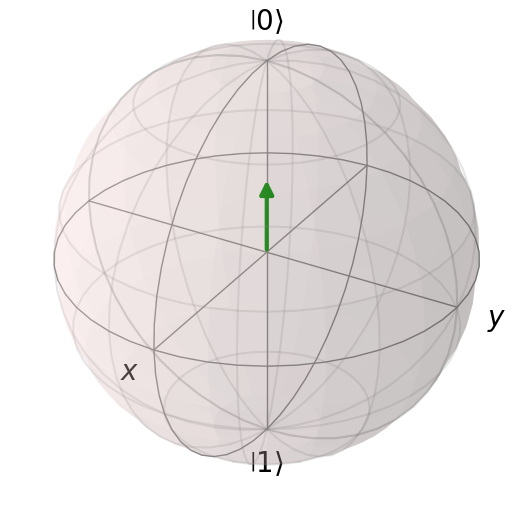

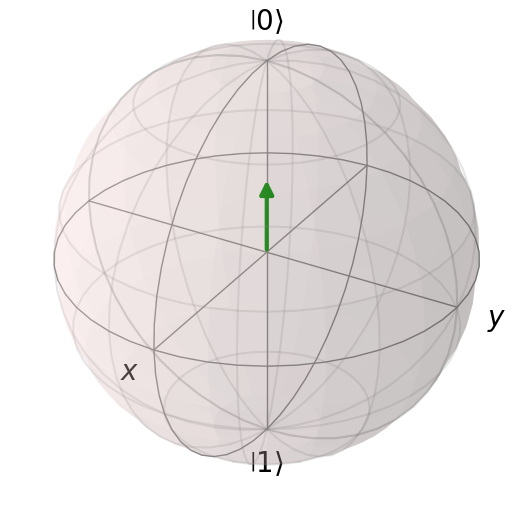

In [ ]:

# --- Example 1: Mixed state  ρ = p|0><0| + (1-p)|1><1| (dephased along z) ---
'''
p = 0.7
rho_mixed = p * ket2dm(basis(2,0)) + (1-p) * ket2dm(basis(2,1))
v1 = bloch_vector_from_density(rho_mixed)
print("Bloch vector (mixed):", v1, " | length =", np.linalg.norm(v1))
plot_on_bloch(v1, title="Mixed state along z")

Bloch vector (pure): [1. 0. 0.]  | length = 0.9999999999999998


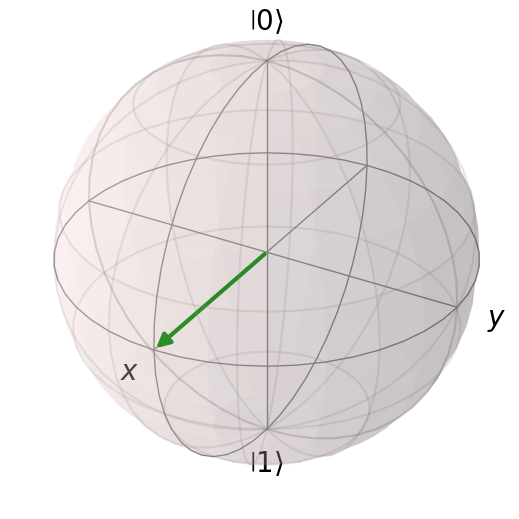

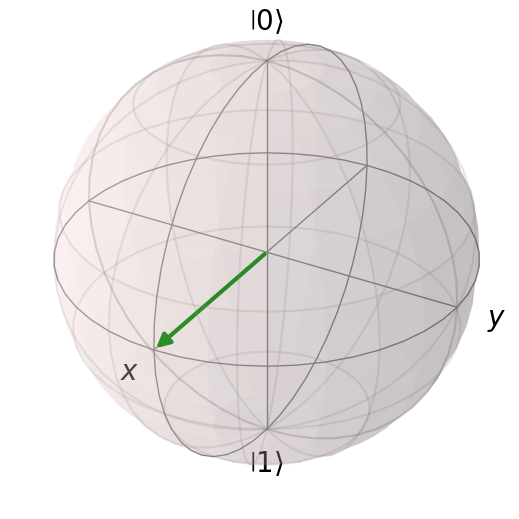

In [ ]:
# --- Example 2: Pure state |+> = (|0> + |1>)/√2 ---
'''
psi = (basis(2,0) + basis(2,1)).unit()   # normalized ket
rho_pure = ket2dm(psi)                   # density matrix
v2 = bloch_vector_from_density(rho_pure)

print("Bloch vector (pure):", v2, " | length =", np.linalg.norm(v2))
plot_on_bloch(v2, title="Pure state |+>")

### Task-2
1. Get a density matrix - in matrix form
2. convert it to its bloch sphere form $$
\rho = \frac{1}{2} \Big( I + \vec{r} \cdot \vec{\sigma} \Big)
$$
3. plot the bloch vector obtained on the 2D sphere
4. Compute the length of the bloch vector $$\vec{r}$$. Then decide if the density matrix corresponed to a **Mixed state** or **Pure state**

In [ ]:
import numpy as np
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# try to solve the linear equation
pauli_x = np.array([[0, 1],[1, 0]])
pauli_y = np.array([[0,-1j],[1j, 0]])
pauli_z = np.array([[1, 0],[0, -1]])

Bloch_vector_x_axis = sp.symbols('rx')
Bloch_vector_y_axis = sp.symbols('ry')
Bloch_vector_z_axis = sp.symbols('rz')

density_matrix_of_bloch_sphere = 0.5*np.array([[1+Bloch_vector_z_axis, Bloch_vector_x_axis-1j*Bloch_vector_y_axis],
 [Bloch_vector_x_axis+1j*Bloch_vector_y_axis, 1-Bloch_vector_z_axis]])

def bloch_vector_from_density(matrix):
    """
    Return (rx, ry, rz) for a single-qubit density matrix ρ using
    r_k = Tr(ρ σ_k). Works with numeric or symbolic entries.
    """
    # Convert to SymPy for exact arithmetic (handles symbols nicely)
    rho = sp.Matrix(matrix)
    sx  = sp.Matrix(pauli_x)
    sy  = sp.Matrix(pauli_y)
    sz  = sp.Matrix(pauli_z)

    rx = sp.simplify(sp.trace(rho * sx))
    ry = sp.simplify(sp.trace(rho * sy))
    rz = sp.simplify(sp.trace(rho * sz))
    return rx, ry, rz


def plot_density_matrix_vector(vec):
    """Plot a Bloch sphere (radius 1) with a given Bloch vector [rx, ry, rz]."""
    # Sphere mesh (parametrized by angles u=azimuth, v=polar)
    u, theta = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
    x = np.cos(u) * np.sin(theta)
    y = np.sin(u) * np.sin(theta)
    z = np.cos(theta)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")

    # Draw sphere surface
    ax.plot_surface(x, y, z, color="lightblue", alpha=0.3, linewidth=0)

    # Draw the Bloch vector
    ax.quiver(0, 0, 0, *vec, color="red", linewidth=2)

    # Label axes
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    # Keep sphere proportions
    ax.set_box_aspect([1,1,1])
    plt.show()




# Task-3
1. The density matrix that it will always start with is ...
2. The user choose an gate to apply
3. One should check if the state is pure to be able to apply any gates.
3. Two spheres are drawn. one before and one after

Now this part will use many of the methods I created above.

Choose a gate to apply (Phase, Hadamard, T): T
Bloch vector before: [1. 0. 0.] | length = 0.9999999999999998
Bloch vector after : [0.70710678 0.70710678 0.        ] | length = 0.9999999999999998


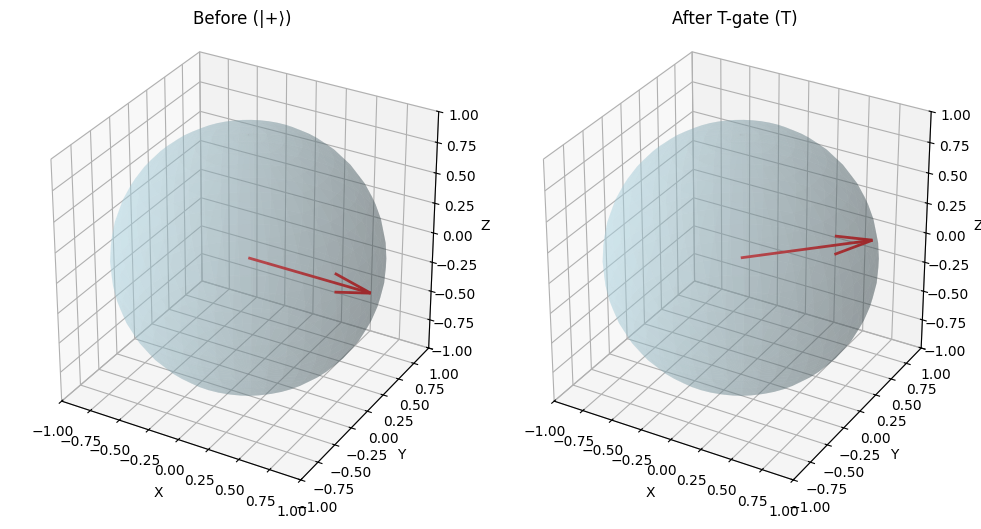

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # registers 3D projection

# -----------------------------
# Pauli matrices (same as yours)
# -----------------------------
pauli_x = np.array([[0, 1],[1, 0]], dtype=complex)
pauli_y = np.array([[0,-1j],[1j, 0]], dtype=complex)
pauli_z = np.array([[1, 0],[0, -1]], dtype=complex)

# ------------------------------------
# Bloch vector from (numeric) density
# ------------------------------------
def bloch_vector_from_density_numpy(rho: np.ndarray):
    """Return (rx, ry, rz) = (Tr[rho X], Tr[rho Y], Tr[rho Z]) as floats."""
    rx = np.trace(rho @ pauli_x).real
    ry = np.trace(rho @ pauli_y).real
    rz = np.trace(rho @ pauli_z).real
    return np.array([rx, ry, rz], dtype=float)

# ------------------------------------
# Purity check for a density matrix
# ------------------------------------
def is_pure_state(rho: np.ndarray, tol: float = 1e-10) -> bool:
    """Pure iff Tr(rho^2) == 1 (within tol)."""
    purity = np.trace(rho @ rho).real
    return abs(purity - 1.0) <= tol

# ---------------------------------------------------
# Plot a single Bloch sphere with a given Bloch vector
# ---------------------------------------------------
def plot_bloch_on_axes(ax, vec, title=None):
    """Draw a Bloch sphere (radius 1) + vector on a provided 3D axis."""
    # Sphere mesh (u=azimuth, th=polar)
    u, th = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
    x = np.cos(u) * np.sin(th)
    y = np.sin(u) * np.sin(th)
    z = np.cos(th)

    # Sphere surface
    ax.plot_surface(x, y, z, color="lightblue", alpha=0.3, linewidth=0)

    # Vector
    ax.quiver(0, 0, 0, *vec, color="red", linewidth=2)

    # Axes cosmetics
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_box_aspect([1, 1, 1])
    if title:
        ax.set_title(title)

# ------------------------------------
# 1) Initialization: fixed pure state
#    Here we choose |+> so Z-phase-like gates visibly rotate it.
#    |+> = (|0> + |1>)/sqrt(2)
# ------------------------------------
ket_plus = (1/np.sqrt(2)) * np.array([[1.0], [1.0]], dtype=complex)
rho0 = ket_plus @ ket_plus.conj().T  # |+><+| = 1/2 [[1,1],[1,1]]

# ------------------------------------
# 2) Ask user for a gate choice
# ------------------------------------
choice = input("Choose a gate to apply (Phase, Hadamard, T): ").strip().lower()

# Define gates (2x2 unitaries)
H = (1/np.sqrt(2)) * np.array([[1, 1],
                               [1,-1]], dtype=complex)

S = np.array([[1, 0],
              [0, 1j]], dtype=complex)            # Phase gate (S = √Z)

T = np.array([[1, 0],
              [0, np.exp(1j*np.pi/4)]], dtype=complex)  # T = diag(1, e^{iπ/4})

if choice in ["phase", "s"]:
    U = S
    gate_name = "Phase (S)"
elif choice in ["hadamard", "h"]:
    U = H
    gate_name = "Hadamard (H)"
elif choice in ["t", "t-gate", "t gate"]:
    U = T
    gate_name = "T-gate (T)"
else:
    raise ValueError("Unrecognized gate. Please choose Phase, Hadamard, or T.")

# ------------------------------------
# 3) Check purity before applying gate
# ------------------------------------
if not is_pure_state(rho0):
    print("The current state is not pure; cannot apply a unitary gate per Task-3.")
    # Still draw the single sphere to visualize current (mixed) state
    v_before = bloch_vector_from_density_numpy(rho0)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111, projection="3d")
    plot_bloch_on_axes(ax, v_before, title="Initial (not pure)")
    plt.show()
else:
    # ------------------------------------
    # 4) Apply gate & draw before/after
    #    ρ' = U ρ U†
    # ------------------------------------
    rho1 = U @ rho0 @ U.conj().T

    v_before = bloch_vector_from_density_numpy(rho0)
    v_after  = bloch_vector_from_density_numpy(rho1)

    # Two spheres side-by-side
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121, projection="3d")
    ax2 = fig.add_subplot(122, projection="3d")

    plot_bloch_on_axes(ax1, v_before, title="Before (|+⟩)")
    plot_bloch_on_axes(ax2, v_after,  title=f"After {gate_name}")

    # Optional: print vectors & norms
    print("Bloch vector before:", v_before, "| length =", np.linalg.norm(v_before))
    print("Bloch vector after :", v_after,  "| length =", np.linalg.norm(v_after))

    plt.tight_layout()
    plt.show()
